# Breast Cancer Prediction - Supervised Learning
### Name: Burhan Hadi Butt
### Enrollment: 03-134211-008
### Class: BSCS - 8A

## Import Libraries

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Load the Dataset

Dataset Details:
* The dataset contains 569 records, representing individual patient data.
* 30 scaled features representing various measurements related to tumor characteristics.
* All features are standardized using StandardScaler to have zero mean and unit variance, which helps improve model performance.
* Target Variable (diagnosis) represents the target class (label) for each patient.

In [2]:
# Load the training and testing data
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/DM/Assignment 2/scaled_breast_cancer_dataset.csv')

## Data Exploration

In [3]:
# First few rows of the dataset
print(dataset.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0             

## Feature Selection

In [4]:
# Split the Dataset into Features and Target
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

In [5]:
# Variance Threshold to Remove Low-Variance Features
selector = VarianceThreshold(threshold=0.1)
features_vt = selector.fit_transform(X)

In [6]:
# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
features_rfe = rfe.fit_transform(X, y)

In [7]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Cross-validation for Variance Threshold-selected features
scores_vt = cross_val_score(model, features_vt, y, cv=5, scoring='accuracy')
mean_score_vt = np.mean(scores_vt)
print("Mean Accuracy Score for Variance Threshold:", mean_score_vt)

# Cross-validation for RFE-selected features
scores_rfe = cross_val_score(model, features_rfe, y, cv=5, scoring='accuracy')
mean_score_rfe = np.mean(scores_rfe)
print("Mean Accuracy Score for Recursive Feature Elimination (RFE):", mean_score_rfe)

Mean Accuracy Score for Variance Threshold: 0.9806862288464524
Mean Accuracy Score for Recursive Feature Elimination (RFE): 0.968390001552554


In [8]:
# Shape of the chosen feature set
print("Shape of the selected feature set:", features_vt.shape)

Shape of the selected feature set: (569, 30)


In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_vt, y, test_size=0.2, random_state=42)

## Model Training and Testing

In [10]:
# Classifier 1: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Classifier 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Classifier 3: Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Classifier 4: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Classifier 5: Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

## Model Evaluation and Analysis

### Decision Tree

In [11]:
# Model Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
class_report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

In [12]:
# Accuracy Score
print(f"Accuracy: {accuracy_dt:.2f}")

# Precision Score
print(f"Precision: {precision_dt:.2f}")

# Recall Score
print(f"Recall: {recall_dt:.2f}")

# F1 Score
print(f"F1-Score: {f1_dt:.2f}")

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


In [13]:
# Classification Report
print("Classification Report:\n", class_report_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



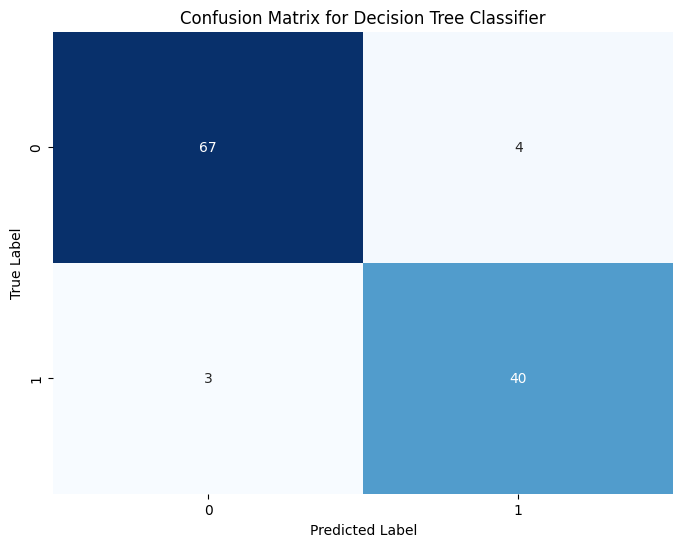

In [14]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest

In [15]:
# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_dt, average='weighted')
recall_rf = recall_score(y_test, y_pred_dt, average='weighted')
f1_rf = f1_score(y_test, y_pred_dt, average='weighted')
class_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [16]:
# Accuracy Score
print(f"Accuracy: {accuracy_rf:.2f}")

# Precision Score
print(f"Precision: {precision_rf:.2f}")

# Recall Score
print(f"Recall: {recall_rf:.2f}")

# F1 Score
print(f"F1-Score: {f1_rf:.2f}")

Accuracy: 0.96
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


In [17]:
# Classification Report
print("Classification Report:\n", class_report_rf)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



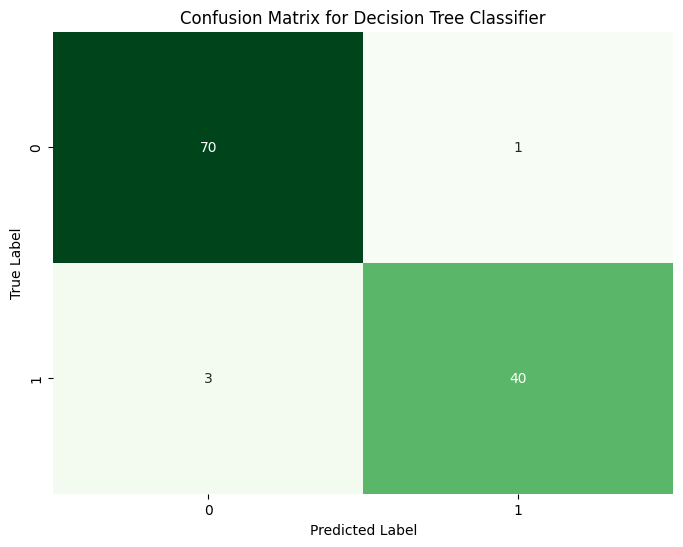

In [18]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Support Vector Machine

In [19]:
# Model Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_dt, average='weighted')
recall_svm = recall_score(y_test, y_pred_dt, average='weighted')
f1_svm = f1_score(y_test, y_pred_dt, average='weighted')
class_report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

In [20]:
# Accuracy Score
print(f"Accuracy: {accuracy_svm:.2f}")

# Precision Score
print(f"Precision: {precision_svm:.2f}")

# Recall Score
print(f"Recall: {recall_svm:.2f}")

# F1 Score
print(f"F1-Score: {f1_svm:.2f}")

Accuracy: 0.97
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


In [21]:
# Classification Report
print("Classification Report:\n", class_report_svm)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



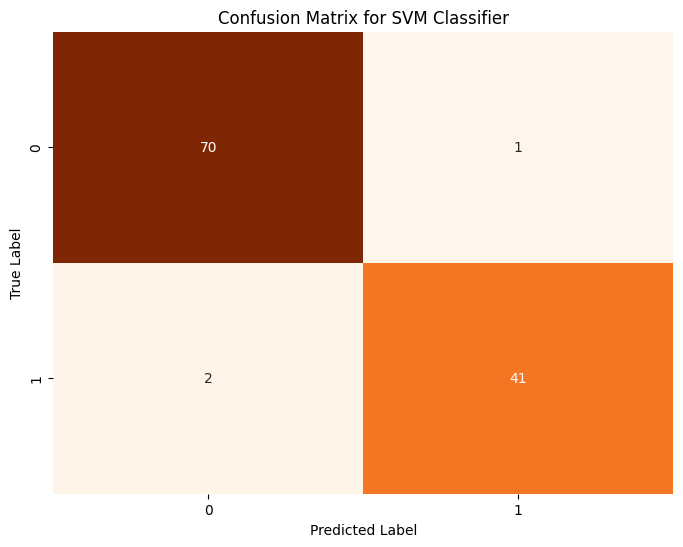

In [22]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### K-Nearest Neighbors

In [23]:
# Model Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_dt, average='weighted')
recall_knn = recall_score(y_test, y_pred_dt, average='weighted')
f1_knn = f1_score(y_test, y_pred_dt, average='weighted')
class_report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

In [24]:
# Accuracy Score
print(f"Accuracy: {accuracy_knn:.2f}")

# Precision Score
print(f"Precision: {precision_knn:.2f}")

# Recall Score
print(f"Recall: {recall_knn:.2f}")

# F1 Score
print(f"F1-Score: {f1_knn:.2f}")

Accuracy: 0.95
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


In [25]:
# Classification Report
print("Classification Report:\n", class_report_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



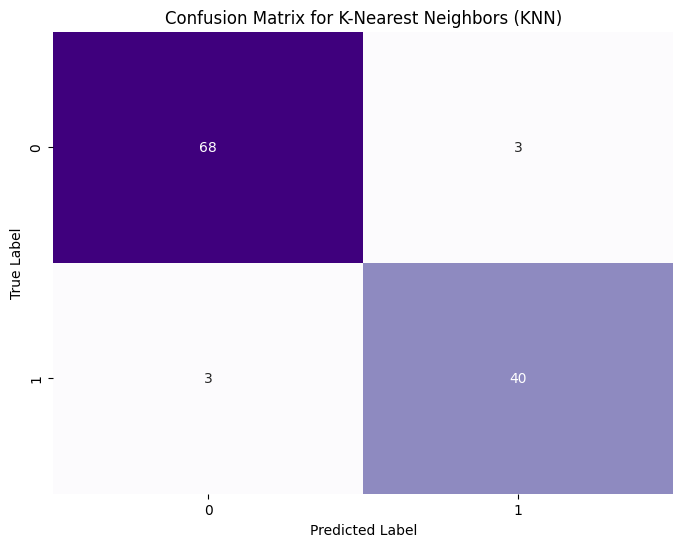

In [26]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Gradient Boosting

In [27]:
# Model Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_dt, average='weighted')
recall_gb = recall_score(y_test, y_pred_dt, average='weighted')
f1_gb = f1_score(y_test, y_pred_dt, average='weighted')
class_report_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

In [28]:
# Accuracy Score
print(f"Accuracy: {accuracy_gb:.2f}")

# Precision Score
print(f"Precision: {precision_gb:.2f}")

# Recall Score
print(f"Recall: {recall_gb:.2f}")

# F1 Score
print(f"F1-Score: {f1_gb:.2f}")

Accuracy: 0.96
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


In [29]:
# Classification Report
print("Classification Report:\n", class_report_gb)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



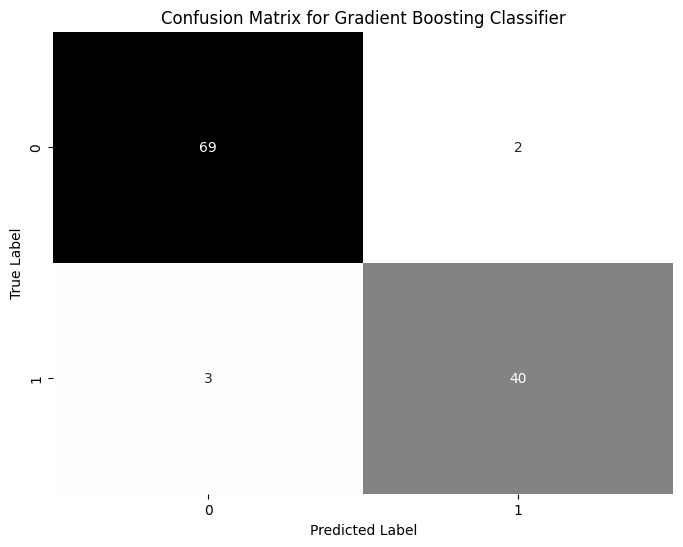

In [30]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Analysis of Classifier Performance

1.  Accuracy:
 * All classifiers performed exceptionally well, with accuracy scores ranging from 0.95 to 0.97.
 * The Support Vector Machine (SVM) had the highest accuracy at 0.97, indicating it was slightly better at correctly classifying instances.

2. Precision, Recall, and F1-Score:
 * Precision, Recall, and F1-Score are all consistently high (between 0.93 to 0.98 across classes).
 * SVM and Random Forest showed higher scores for the minority class (1), suggesting they were more reliable in identifying true positives and minimizing false positives.
 * K-Nearest Neighbors (KNN) and Decision Tree had slightly lower precision and recall for the minority class compared to SVM and Random Forest, but overall performance was still strong.

3. Classification Report:
 * The SVM classifier stood out for having the highest f1-score for both classes, demonstrating an effective balance between precision and recall.
 * Random Forest also exhibited very competitive results, showing particularly high precision for class 1.

Summary of Findings:
SVM showed the best performance overall with an accuracy of 0.97 and consistently high precision, recall, and F1-scores across both classes.
Random Forest and Gradient Boosting also performed very well, offering slightly lower accuracy but still providing strong and balanced performance metrics.
Decision Tree and KNN performed well but showed slightly reduced precision and recall for the minority class, indicating a minor weakness in handling positive class predictions compared to SVM.
Based on these results, the Support Vector Machine and Random Forest appear to be the most effective classifiers for this dataset, providing high accuracy and strong predictive capabilities across both classes.